In [ ]:
# WorkFlow
#      Wine Dataset----Data Analysis--Data Preprocessing---Train Test Split---Random Forest Model(sepervised model)
#      Train Random Forest Model 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
df=pd.read_csv('/content/winequality-red.csv.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visualization


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df1=df.corr()
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


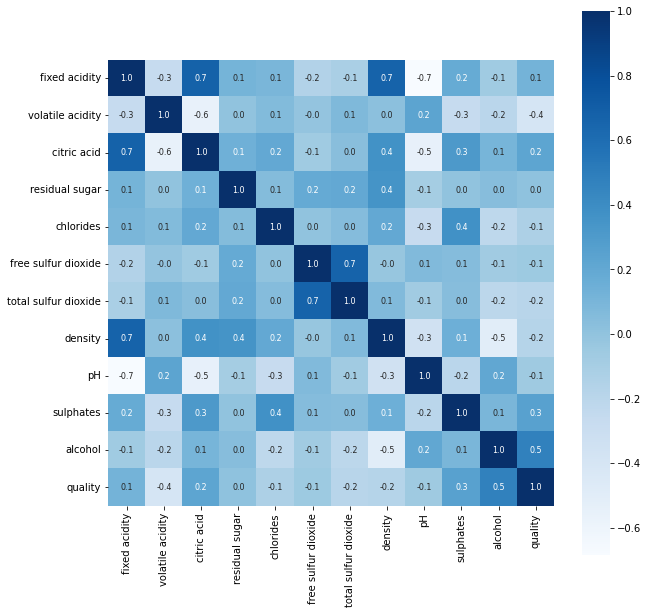

In [ ]:
#Correlation on heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data=df1,cbar=True,square=True,fmt='.1f',annot=True, cmap='Blues',annot_kws={'size':8})
plt.show()

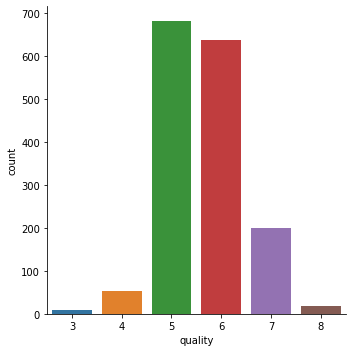

In [ ]:
# plot for value count
sns.catplot(x='quality',data=df,kind='count')

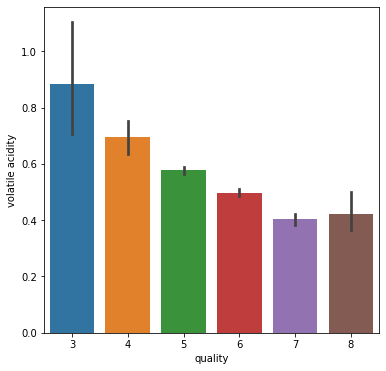

In [ ]:
#colatile acidity vs quality
plt.figure(figsize=(6,6))
sns.barplot(x='quality',y='volatile acidity',data=df)

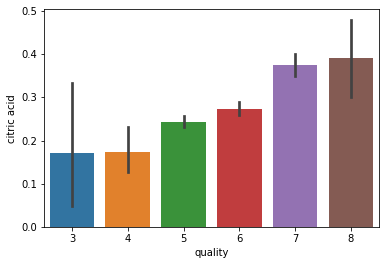

In [ ]:
sns.barplot(x='quality',y='citric acid',data=df)

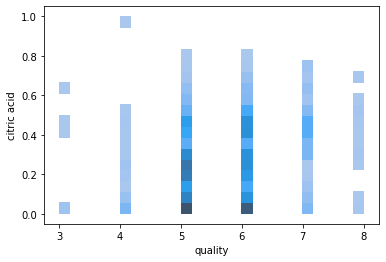

In [ ]:
sns.histplot(x='quality',y='citric acid',data=df)

Data Preprocessing For Linear Regression


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


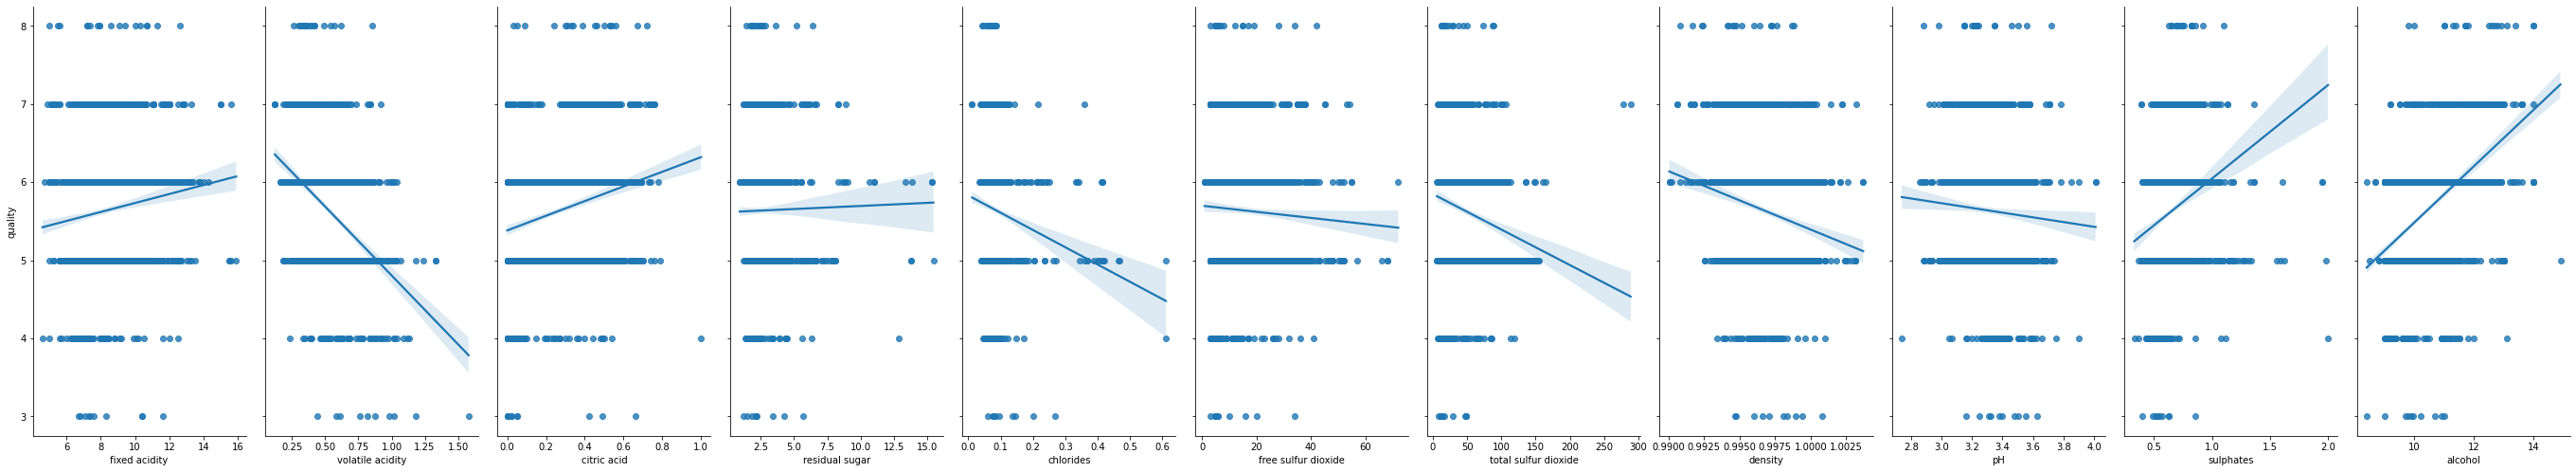

In [ ]:
feature=['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	
         'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']
T=df[feature]
U=df['quality']
sns.pairplot(x_vars=feature,y_vars='quality',data=df,kind='reg',size=7,aspect=0.5)
plt.show()

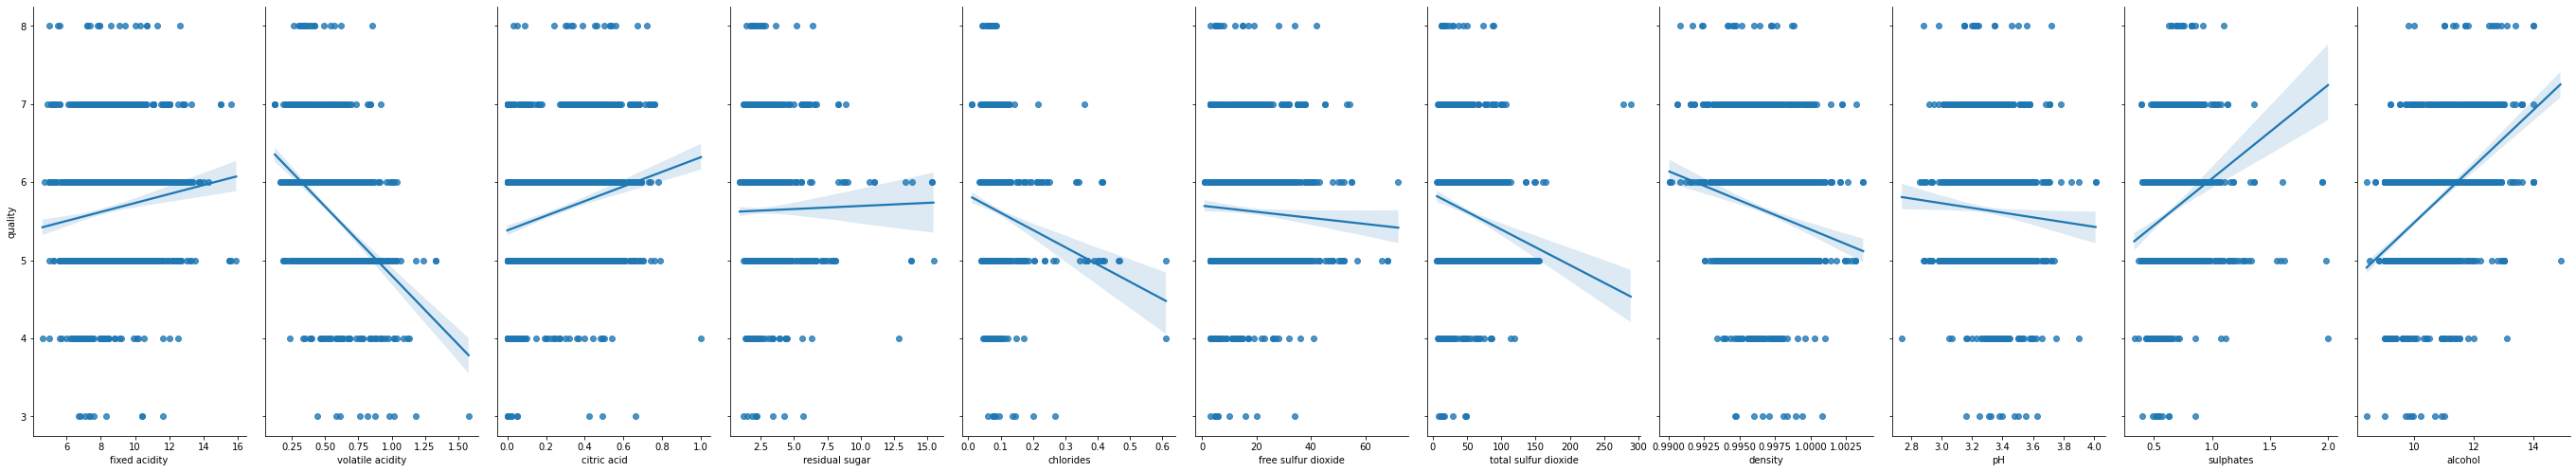

In [ ]:
feature=['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	
         'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']
T=df[feature]
U=df['quality']
sns.pairplot(x_vars=feature,y_vars='quality',data=df,kind='reg',height=7,aspect=0.5)
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(T,U,test_size=0.2,random_state=2)

Data Preprocessing For Random Forest

In [ ]:
X=df.drop('quality',axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Label Binarization

In [ ]:
Y=df['quality'].apply(lambda y_value: 1 if y_value>=5 else 0)
Y

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1599, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)


In [ ]:
print(Y_test)

147     1
937     0
877     1
1000    1
73      0
       ..
841     1
889     1
1145    1
1476    1
187     1
Name: quality, Length: 320, dtype: int64


In [ ]:
print(X_test.shape,X_train.shape,Y_test.shape,Y_train.shape)

(320, 11) (1279, 11) (320,) (1279,)


#Model Testing
random forest classification

In [ ]:
model=RandomForestClassifier()

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier()

Model Evaluation

In [ ]:
x_test_prediction=model.predict(X_test)
test_accuracy=accuracy_score(x_text_prediction,Y_test)

NameError: ignored

In [ ]:
print('Accuracy Score For test: ', test_accuracy)

In [ ]:
x_train_prediction=model.predict(X_train)
train_accuracy=accuracy_score(x_train_prediction,Y_train)

In [ ]:
print('Accuracy Score For Train: ', train_accuracy)

Build a prediction System

In [ ]:
input_data = (6.8,0.63,0.07,2.1,0.089,11.0,44.0,0.9953,3.47,0.55,10.4)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)



In [ ]:
if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Model using LinearRegression

In [ ]:
reg=LinearRegression()

In [ ]:
reg.fit(X_train,Y_train)

In [ ]:
accuracy=reg.score(X_test,Y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [ ]:
print(accuracy)

In [ ]:
input_data1 = (6.8,0.63,0.07,2.1,0.089,11.0,44.0,0.9953,3.47,0.55,10.4)

# changing the input data to a numpy array
input_data_as_numpy_array1 = np.asarray(input_data1)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped1 = input_data_as_numpy_array1.reshape(1,-1)

prediction1 = model.predict(input_data_reshaped1)
print(prediction1)



In [ ]:
if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')